<a href="https://colab.research.google.com/github/mayankdeshmukh/Data-Science-and-Machine-Learning/blob/main/Random_Forest_Fraud_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random Forest - Fraud Check

###Use Random Forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

##Importing Dataset

In [ ]:
fraud = pd.read_csv("/content/Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
fraud_data = fraud.drop(['City.Population'], axis = 1)
fraud_data

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,NO,Single,68833,10,YES
1,YES,Divorced,33700,18,YES
2,NO,Married,36925,30,YES
3,YES,Single,50190,15,YES
4,NO,Married,81002,28,NO
...,...,...,...,...,...
595,YES,Divorced,76340,7,YES
596,YES,Divorced,69967,2,YES
597,NO,Divorced,47334,0,YES
598,YES,Married,98592,17,NO


In [ ]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
dtypes: int64(2), object(3)
memory usage: 23.6+ KB


In [ ]:
y1 = np.empty(600, dtype = object)
i = 0

for value in fraud_data['Taxable.Income']:
  if value<=30000:
    y1[i] = 'Risky'
  else:
    y1[i] = 'Good'

    i = i + 1

In [ ]:
t1 = pd.DataFrame(y1, columns = ['Target'])
t1

,Target
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,None
596,None
597,None
598,None


In [ ]:
fraud_data = pd.concat([fraud_data, t1], axis = 1)
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Target
0,0,2,68833,10,1,Good
1,1,0,33700,18,1,Good
2,0,1,36925,30,1,Good
3,1,2,50190,15,1,Good
4,0,1,81002,28,0,Good


In [ ]:
fraud_data.isna().sum()

Undergrad            0
Marital.Status       0
Taxable.Income       0
Work.Experience      0
Urban                0
Target             124
dtype: int64

In [ ]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    int64 
 1   Marital.Status   600 non-null    int64 
 2   Taxable.Income   600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    int64 
 5   Target           476 non-null    object
dtypes: int64(5), object(1)
memory usage: 28.2+ KB


In [ ]:
fraud_data.corr()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
Undergrad,1.000000,0.042407,-0.049232,-0.005362,-0.000267
Marital.Status,0.042407,1.000000,-0.012944,-0.002213,0.064562
Taxable.Income,-0.049232,-0.012944,1.000000,-0.001818,0.070628
Work.Experience,-0.005362,-0.002213,-0.001818,1.000000,-0.094559
Urban,-0.000267,0.064562,0.070628,-0.094559,1.000000


In [ ]:
fraud_data.groupby(['Undergrad', 'Marital.Status', 'Urban']).count()

Taxable.Income  Work.Experience  Target
Undergrad Marital.Status Urban                                         
0         0              0                  53               53      38
                         1                  44               44      33
          1              0                  44               44      34
                         1                  47               47      39
          2              0                  46               46      36
                         1                  54               54      43
1         0              0                  50               50      44
                         1                  42               42      33
          1              0                  50               50      41
                         1                  53               53      41
          2              0                  55               55      48
                         1                  62               62      46

##Label Encoding

In [ ]:
label_encoder = preprocessing.LabelEncoder()
fraud_data['Undergrad']= label_encoder.fit_transform(fraud_data['Undergrad'])
fraud_data['Marital.Status']= label_encoder.fit_transform(fraud_data['Marital.Status'])
fraud_data['Urban']= label_encoder.fit_transform(fraud_data['Urban'])
fraud_data['Target']= label_encoder.fit_transform(fraud_data['Target'])

In [ ]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban,Target
0,0,2,68833,10,1,0
1,1,0,33700,18,1,0
2,0,1,36925,30,1,0
3,1,2,50190,15,1,0
4,0,1,81002,28,0,0


In [ ]:
fraud_data.Target.value_counts()

0    476
1    124
Name: Target, dtype: int64

In [ ]:
colnames = list(fraud_data.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'Work.Experience',
 'Urban',
 'Target']

##Visualization

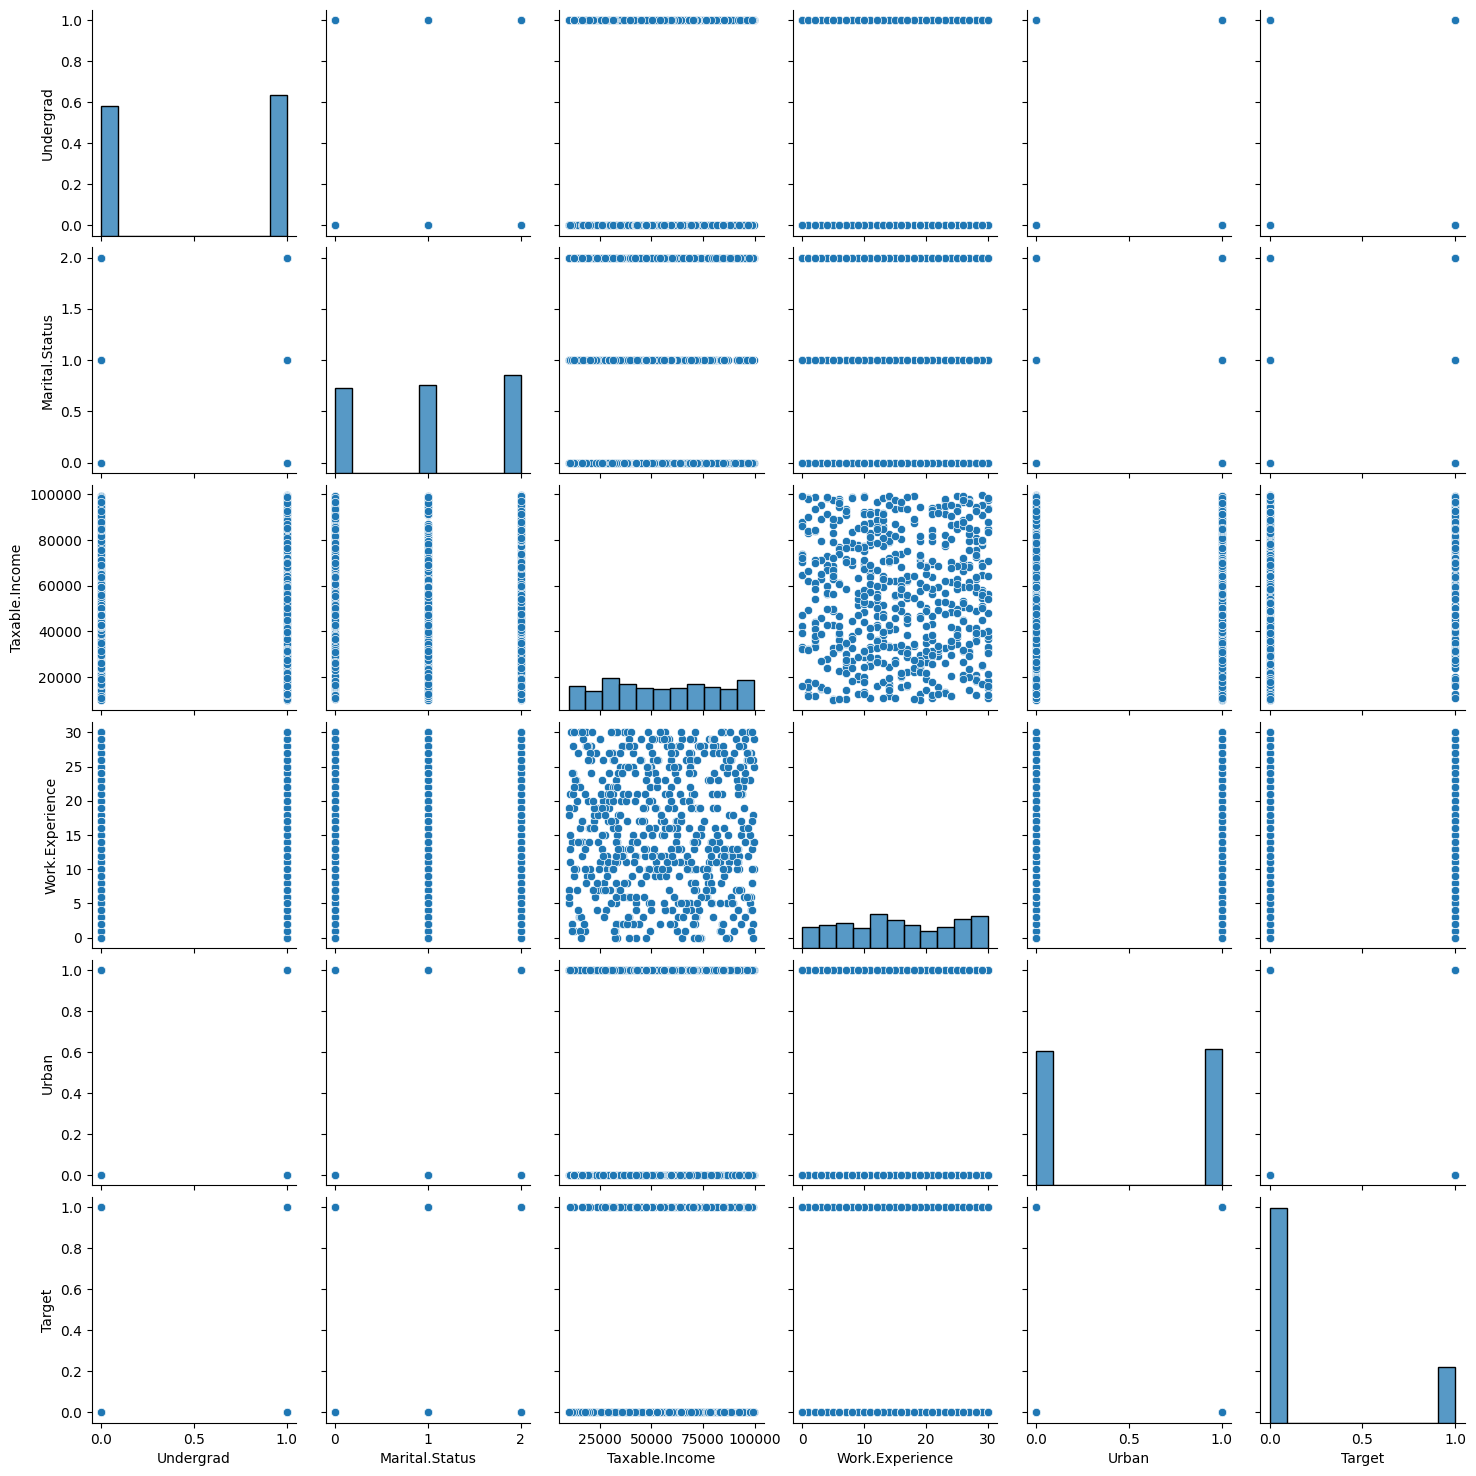

In [ ]:
sns.pairplot(fraud_data)

<Axes: xlabel='Taxable.Income', ylabel='Density'>

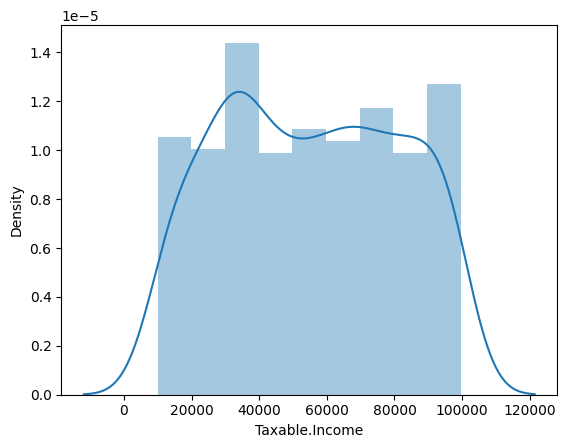

In [ ]:
sns.distplot(fraud_data['Taxable.Income'])

<Axes: xlabel='Work.Experience', ylabel='Density'>

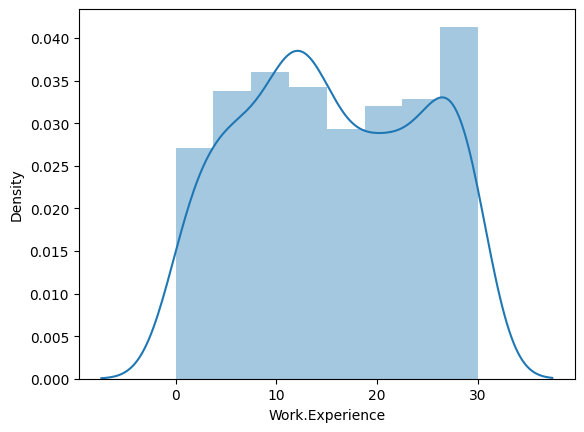

In [ ]:
sns.distplot(fraud_data['Work.Experience'])

<Axes: >

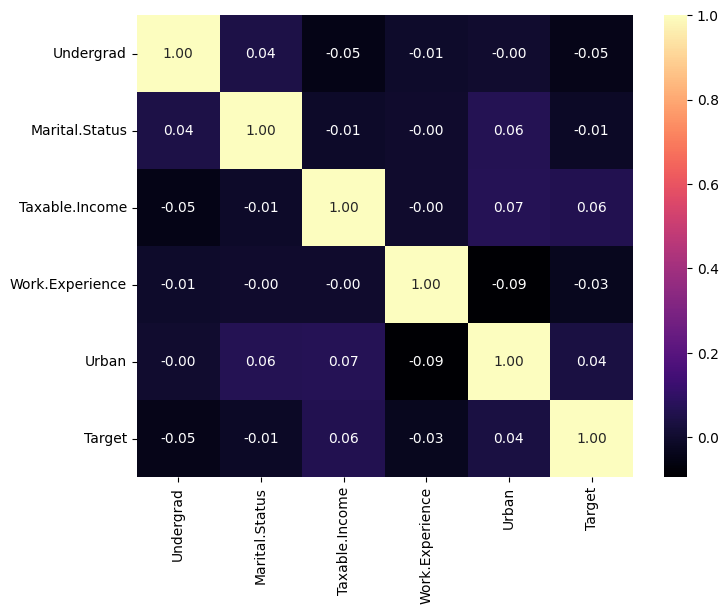

In [ ]:
plt.figure(figsize = (8, 6));
sns.heatmap(fraud_data.corr(), cmap = 'magma', annot = True, fmt = ".2f")

<Axes: xlabel='Taxable.Income', ylabel='Work.Experience'>

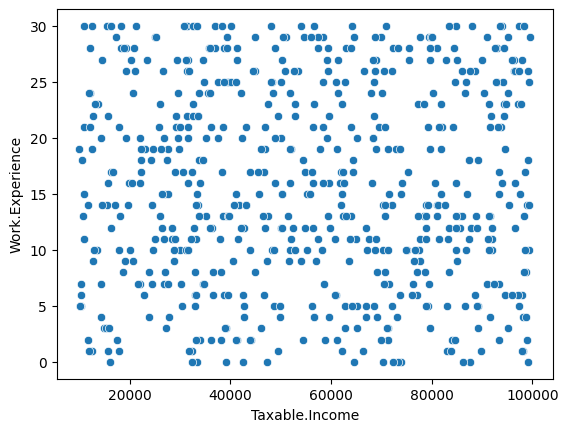

In [ ]:
sns.scatterplot(x = "Taxable.Income", y = "Work.Experience", data = fraud_data)

In [ ]:
x1 = fraud_data.iloc[:, 0:5]
y1 = fraud_data[['Target']]
x1.head()

,Undergrad,Marital.Status,Taxable.Income,Work.Experience,Urban
0,0,2,68833,10,1
1,1,0,33700,18,1
2,0,1,36925,30,1
3,1,2,50190,15,1
4,0,1,81002,28,0


In [ ]:
y1.tail()

,Target
595,1
596,1
597,1
598,1
599,1


##Machine Learning Algorithm - Random Forest Classification

In [ ]:
num_trees = 82
max_features = 4

In [ ]:
kfold = KFold(n_splits = 8, random_state = 27, shuffle = True)
model = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)

In [ ]:
results = cross_val_score(model, x1, y1, cv  = kfold)
print(results.mean())

0.7333333333333333


##Random Forest Regression

In [ ]:
num_trees = 65
max_features = 7

In [ ]:
kfold = KFold(n_splits = 7, random_state = 14, shuffle = True)
model2 = RandomForestClassifier(n_estimators = num_trees, max_features = max_features)

In [ ]:
results = cross_val_score(model2, x1, y1, cv = kfold)
print(results.mean())

0.7399257377369554
